# Classification to find the city or region and Regression to find the average price of avocados in 2015

In [187]:
# Load relevant libraries

In [188]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

In [189]:
# Load data
ds=pd.read_csv('avocado.csv')

In [190]:
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [191]:
ds.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [192]:
ds.shape

(1517, 14)

In [193]:
ds.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [194]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   int64  
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   int64  
 13  region        1517 non-null   object 
dtypes: float64(9), int64(2), object(3)
memory usage: 166.0+ KB


In [195]:
ds.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

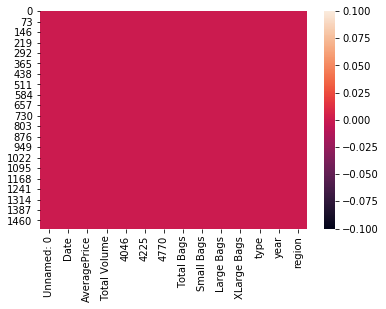

In [196]:
sns.heatmap(ds.isnull())

No null values

In [197]:
dscor=ds.corr()
dscor

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
Unnamed: 0,1.000000,-0.075531,0.091934,0.092013,0.093566,0.075647,0.081007,0.083485,0.065364,-0.050993,-0.012854
AveragePrice,-0.075531,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.178683
Total Volume,0.091934,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.004189
4046,0.092013,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.040439
4225,0.093566,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.007254
4770,0.075647,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,0.029222
Total Bags,0.081007,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,0.090108
Small Bags,0.083485,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,0.106382
Large Bags,0.065364,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.018678
XLarge Bags,-0.050993,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.218342


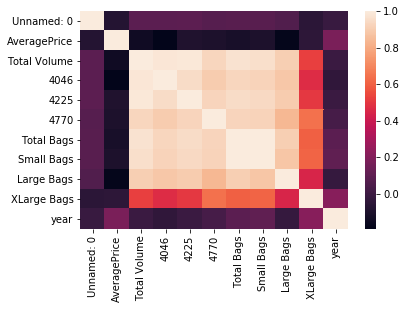

In [198]:
sns.heatmap(dscor)

Data visualizations

In [199]:
ds.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [200]:
# Show the mean average price per region per year
ds.groupby(['region','year'])['AveragePrice'].mean()

region               year
Albany               2015    1.171923
                     2016    1.470000
Atlanta              2015    1.049487
                     2016    0.914667
BaltimoreWashington  2015    1.168049
                     2016    1.148750
Boise                2015    1.058000
                     2016    0.923000
Boston               2015    1.180000
                     2016    1.215909
BuffaloRochester     2015    1.331111
                     2016    1.295238
California           2015    1.077083
                     2016    1.046154
Charlotte            2015    1.175000
                     2016    1.457333
Chicago              2015    1.214783
Columbus             2015    1.012553
DallasFtWorth        2015    0.755882
Denver               2015    1.080833
Detroit              2015    1.041250
GrandRapids          2015    1.136957
GreatLakes           2015    1.107222
HarrisburgScranton   2015    1.157368
HartfordSpringfield  2015    1.209231
Houston              201

The average price differs between regions and over years, presumably due to transport costs and the amount produced.

In [201]:
# Show the total volume and bag sizes sold per regions per year
ds.groupby(['region','year'])['Total Volume','Small Bags', 'Large Bags', 'XLarge Bags'].sum()

Total Volume    Small Bags   Large Bags  XLarge Bags
region              year                                                      
Albany              2015  3.962854e+06  6.442316e+05     17997.07       137.50
                    2016  1.148589e+06  1.474066e+05      5268.47       100.16
Atlanta             2015  1.707703e+07  1.535275e+06    805036.05       828.45
                    2016  8.175373e+06  1.024864e+06   1287305.32      2428.10
BaltimoreWashington 2015  3.177335e+07  7.158354e+06    183398.69      3474.45
                    2016  2.072352e+07  4.553931e+06     90995.38     14236.95
Boise               2015  1.887500e+06  1.629895e+05      2364.58       380.47
                    2016  3.380501e+06  1.479558e+06     46277.66      1963.19
Boston              2015  8.195407e+06  1.935864e+06     18655.89       145.83
                    2016  2.611903e+07  5.567129e+06     28764.73     35524.44
BuffaloRochester    2015  8.935309e+05  4.706998e+05      3386.66         0.00
                    2016  5.847872e+06  2.872231e+06     16215.32     34824.16
California          2015  1.411930e+08  1.414581e+07    627904.51     68368.73
                    2016  3.174880e+08  8.364900e+07   7698289.97   1359896.24
Charlotte           2015  3.080092e+06  9.155281e+05     38968.15        98.61
                    2016  2.384531e+06  7.184768e+05    123178.21      1375.00
Chicago             2015  1.867329e+07  2.178184e+06     70406.78     12272.83
Columbus            2015  6.850740e+06  8.770419e+05    189548.18     91093.79
DallasFtWorth       2015  2.032117e+07  1.473983e+06    209693.36      2165.16
Denver              2015  1.722244e+07  1.461112e+06   1203243.87      2102.43
Detroit             2015  1.356261e+07  2.465408e+06     62307.13    373516.17
GrandRapids         2015  4.390393e+06  1.364880e+06     94862.18     20276.83
GreatLakes          2015  5.897445e+07  1.026223e+07   1857802.51    304040.12
HarrisburgScranton  2015  4.148077e+06  1.315304e+06     33514.17       101.39
HartfordSpringfield 2015  3.491504e+06  5.429578e+05     32060.55         0.00
Houston             2015  3.235137e+07  2.222264e+06   1361989.05       188.89
Indianapolis        2015  2.520069e+06  4.024222e+05    226734.34     17582.32
Jacksonville        2015  5.658909e+06  7.712478e+05    596766.61       206.44
LasVegas            2015  2.790102e+06  3.627889e+05      5023.17         0.00
LosAngeles          2015  8.196539e+06  6.994014e+05     88764.64      8779.78
Louisville          2015  2.639857e+06  3.999434e+05    366446.02     27505.51
MiamiFtLauderdale   2015  8.012470e+06  7.749961e+05    637821.12       833.33
Midsouth            2015  4.239178e+07  8.000987e+06    977672.07     37666.03
Nashville           2015  4.186786e+06  6.288801e+05    138815.66      4275.05
NewYork             2015  5.997083e+07  1.024917e+07   2434277.20      2948.87
Northeast           2015  4.159036e+07  9.991090e+06   1088593.44         3.27
NorthernNewEngland  2015  1.148272e+07  1.899917e+06      5840.38         0.00
Orlando             2015  6.328122e+06  7.591126e+05    576319.12       944.12
Philadelphia        2015  5.003987e+06  1.250215e+06    172242.64         3.01
PhoenixTucson       2015  5.661233e+07  3.835101e+06    931159.66       613.88
Pittsburgh          2015  1.791478e+06  3.625279e+05    200083.85       383.80
Plains              2015  2.007570e+07  2.897658e+06     22456.58     12711.19
Portland            2015  1.485553e+07  3.805704e+06     34383.74     17363.67
RaleighGreensboro   2015  3.848596e+06  1.016299e+06    102470.50         0.00
RichmondNorfolk     2015  4.131917e+06  7.205331e+05      6687.25        69.88
Roanoke             2015  2.225069e+06  5.098687e+05     14179.15         3.00
SanDiego            2015  1.905142e+07  1.819883e+06    312715.52       129.33
SanFrancisco        2015  1.275176e+07  1.257875e+06     12086.80      1010.02
Seattle             2015  4.405780e+06  1.767013e+06        74.19      2136.

In the above table we can see the total volume sold per region and the distribution of the bag sizes sold per region.

In [202]:
ds.groupby(['region','year'])['Total Volume'].sum()

region               year
Albany               2015    3.962854e+06
                     2016    1.148589e+06
Atlanta              2015    1.707703e+07
                     2016    8.175373e+06
BaltimoreWashington  2015    3.177335e+07
                     2016    2.072352e+07
Boise                2015    1.887500e+06
                     2016    3.380501e+06
Boston               2015    8.195407e+06
                     2016    2.611903e+07
BuffaloRochester     2015    8.935309e+05
                     2016    5.847872e+06
California           2015    1.411930e+08
                     2016    3.174880e+08
Charlotte            2015    3.080092e+06
                     2016    2.384531e+06
Chicago              2015    1.867329e+07
Columbus             2015    6.850740e+06
DallasFtWorth        2015    2.032117e+07
Denver               2015    1.722244e+07
Detroit              2015    1.356261e+07
GrandRapids          2015    4.390393e+06
GreatLakes           2015    5.897445e+07
Harrisbu

# Fitler on years to remove 2016 data to represent only 2015 in data visualization

In [203]:
# filter rows for 2015
y2015=ds['year']==2015
ds_2015=ds[y2015]
ds_2015.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1265,47,1/2/2015,0.71,916367.42,611270.39,205181.23,14107.36,85808.44,82065.70,3742.74,0.0,conventional,2015,WestTexNewMexico
1266,48,25-01-2015,0.80,720800.61,519142.82,124248.86,10573.29,66835.64,65072.69,1762.95,0.0,conventional,2015,WestTexNewMexico
1267,49,18-01-2015,0.80,729795.72,516446.41,128438.87,12473.14,72437.30,71564.22,873.08,0.0,conventional,2015,WestTexNewMexico
1268,50,11/1/2015,0.92,584896.99,347125.63,129717.42,27944.07,80109.87,78503.46,1606.41,0.0,conventional,2015,WestTexNewMexico
1269,51,4/1/2015,0.75,758118.95,426878.87,147958.43,15267.89,168013.76,165202.22,2811.54,0.0,conventional,2015,WestTexNewMexico


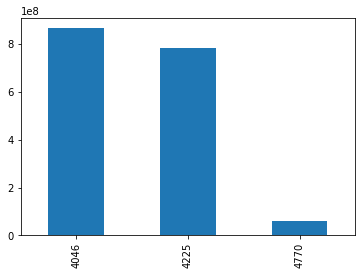

In [204]:
# Show the distribution of amount sold by avocado size for 2015
avo_sizes=ds_2015.drop(columns=['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'])
avo_sizes.sum().plot(kind = 'bar')

Avo sizes:
    4046 = small
    4225 = large
    4770 = extra large
Consumers seem to favor small Hass, closely followed by and large Hass, but are less fond of extra large Hass.

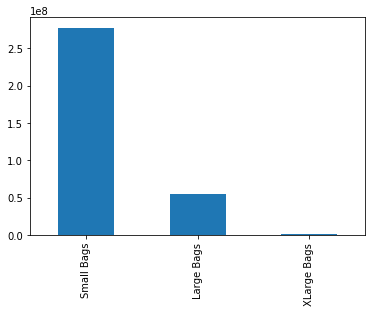

In [205]:
# Show the distribution of amount sold by bag sizes for 2015
bag_sizes=ds_2015.drop(columns=['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'type',
       'year', 'region'])
bag_sizes.sum().plot(kind = 'bar')

Small bags are by far the most popular with consumers

In [206]:
ds['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'Columbus', 'DallasFtWorth', 'Denver', 'Detroit', 'GrandRapids',
       'GreatLakes', 'HarrisburgScranton', 'HartfordSpringfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'LasVegas',
       'LosAngeles', 'Louisville', 'MiamiFtLauderdale', 'Midsouth',
       'Nashville', 'NewYork', 'Northeast', 'NorthernNewEngland',
       'Orlando', 'Philadelphia', 'PhoenixTucson', 'Pittsburgh', 'Plains',
       'Portland', 'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

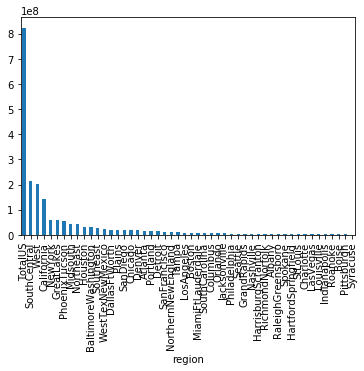

In [207]:
# Show the total volume sold by region for 2015
ds_2015.groupby('region')['Total Volume'].sum().sort_values(ascending=False).head(50).plot.bar()

Shows which areas avocados are more popular

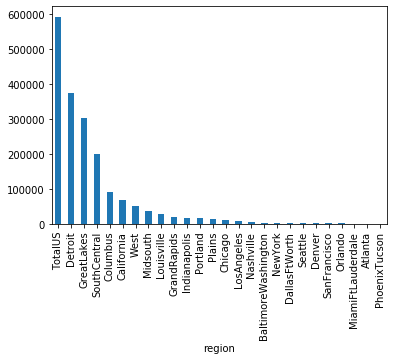

In [208]:
# Show the amount of Xlarge bags sold by region for 2015
ds_2015.groupby('region')['XLarge Bags'].sum().sort_values(ascending=False).head(26).plot.bar()

Shows areas where large bags are the most popular.

# Encode categorical data to numerical data with LabelEncoder

In [209]:
# Change categorical data to numerical data for all categoriacl columns

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()
ds['region'] = le.fit_transform(ds['region'])

In [210]:
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,0
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,0
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,0
3,3,6/12/2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,0
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,0


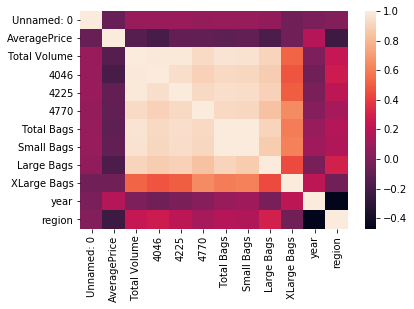

In [211]:
dscor=ds.corr()
sns.heatmap(dscor)

The correlations look slightly different after the region was encoded.

In [212]:
year_counts = ds['year'].value_counts()
year_counts

2015    1270
2016     247
Name: year, dtype: int64

In [213]:
year_percentage = ds['year'].value_counts(normalize=True).mul(100).round(1).astype(str) + '%'
year_percentage

2015    83.7%
2016    16.3%
Name: year, dtype: object

The data is not distributed evenly over years and as years is the only reasonable metric that correlates positively with average price the linear model will have difficulty making accurate predictions.

# Drop irrelevant columns

In [214]:
ds.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [215]:
ds=ds.drop(columns=['Unnamed: 0', 'Date',  'type'])

# Check and remove outliers

In [216]:
ds.shape

(1517, 11)

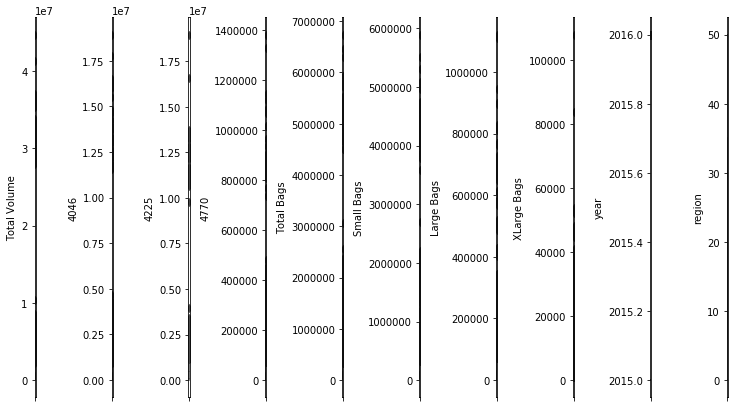

In [217]:
# Show boxplots for all numerical columns, check outliers
collist=ds.columns.values
ncol=11
nrows=10

plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(ds[collist[i]], color='red', orient='v')
    plt.tight_layout()

In [218]:
# Remove outliers with zscore
from scipy.stats import zscore
z_score=abs(zscore(ds))
print(ds.shape)
nds=ds.loc[(z_score<3).all(axis=1)]
print(nds.shape)

(1517, 11)
(1436, 11)


# Check and treat skewness

In [219]:
nds.skew()

AveragePrice   -0.184770
Total Volume    2.704085
4046            3.120756
4225            2.367429
4770            3.331191
Total Bags      4.165747
Small Bags      4.410267
Large Bags      3.518056
XLarge Bags     5.118965
year            2.004439
region          0.276276
dtype: float64

In [220]:
#Treating using log
for col in nds.columns:
    if nds.skew().loc[col]>0.55:
        nds[col]=np.log1p(nds[col])

In [221]:
nds.skew()

AveragePrice   -0.184770
Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
region          0.276276
dtype: float64

Not perfect

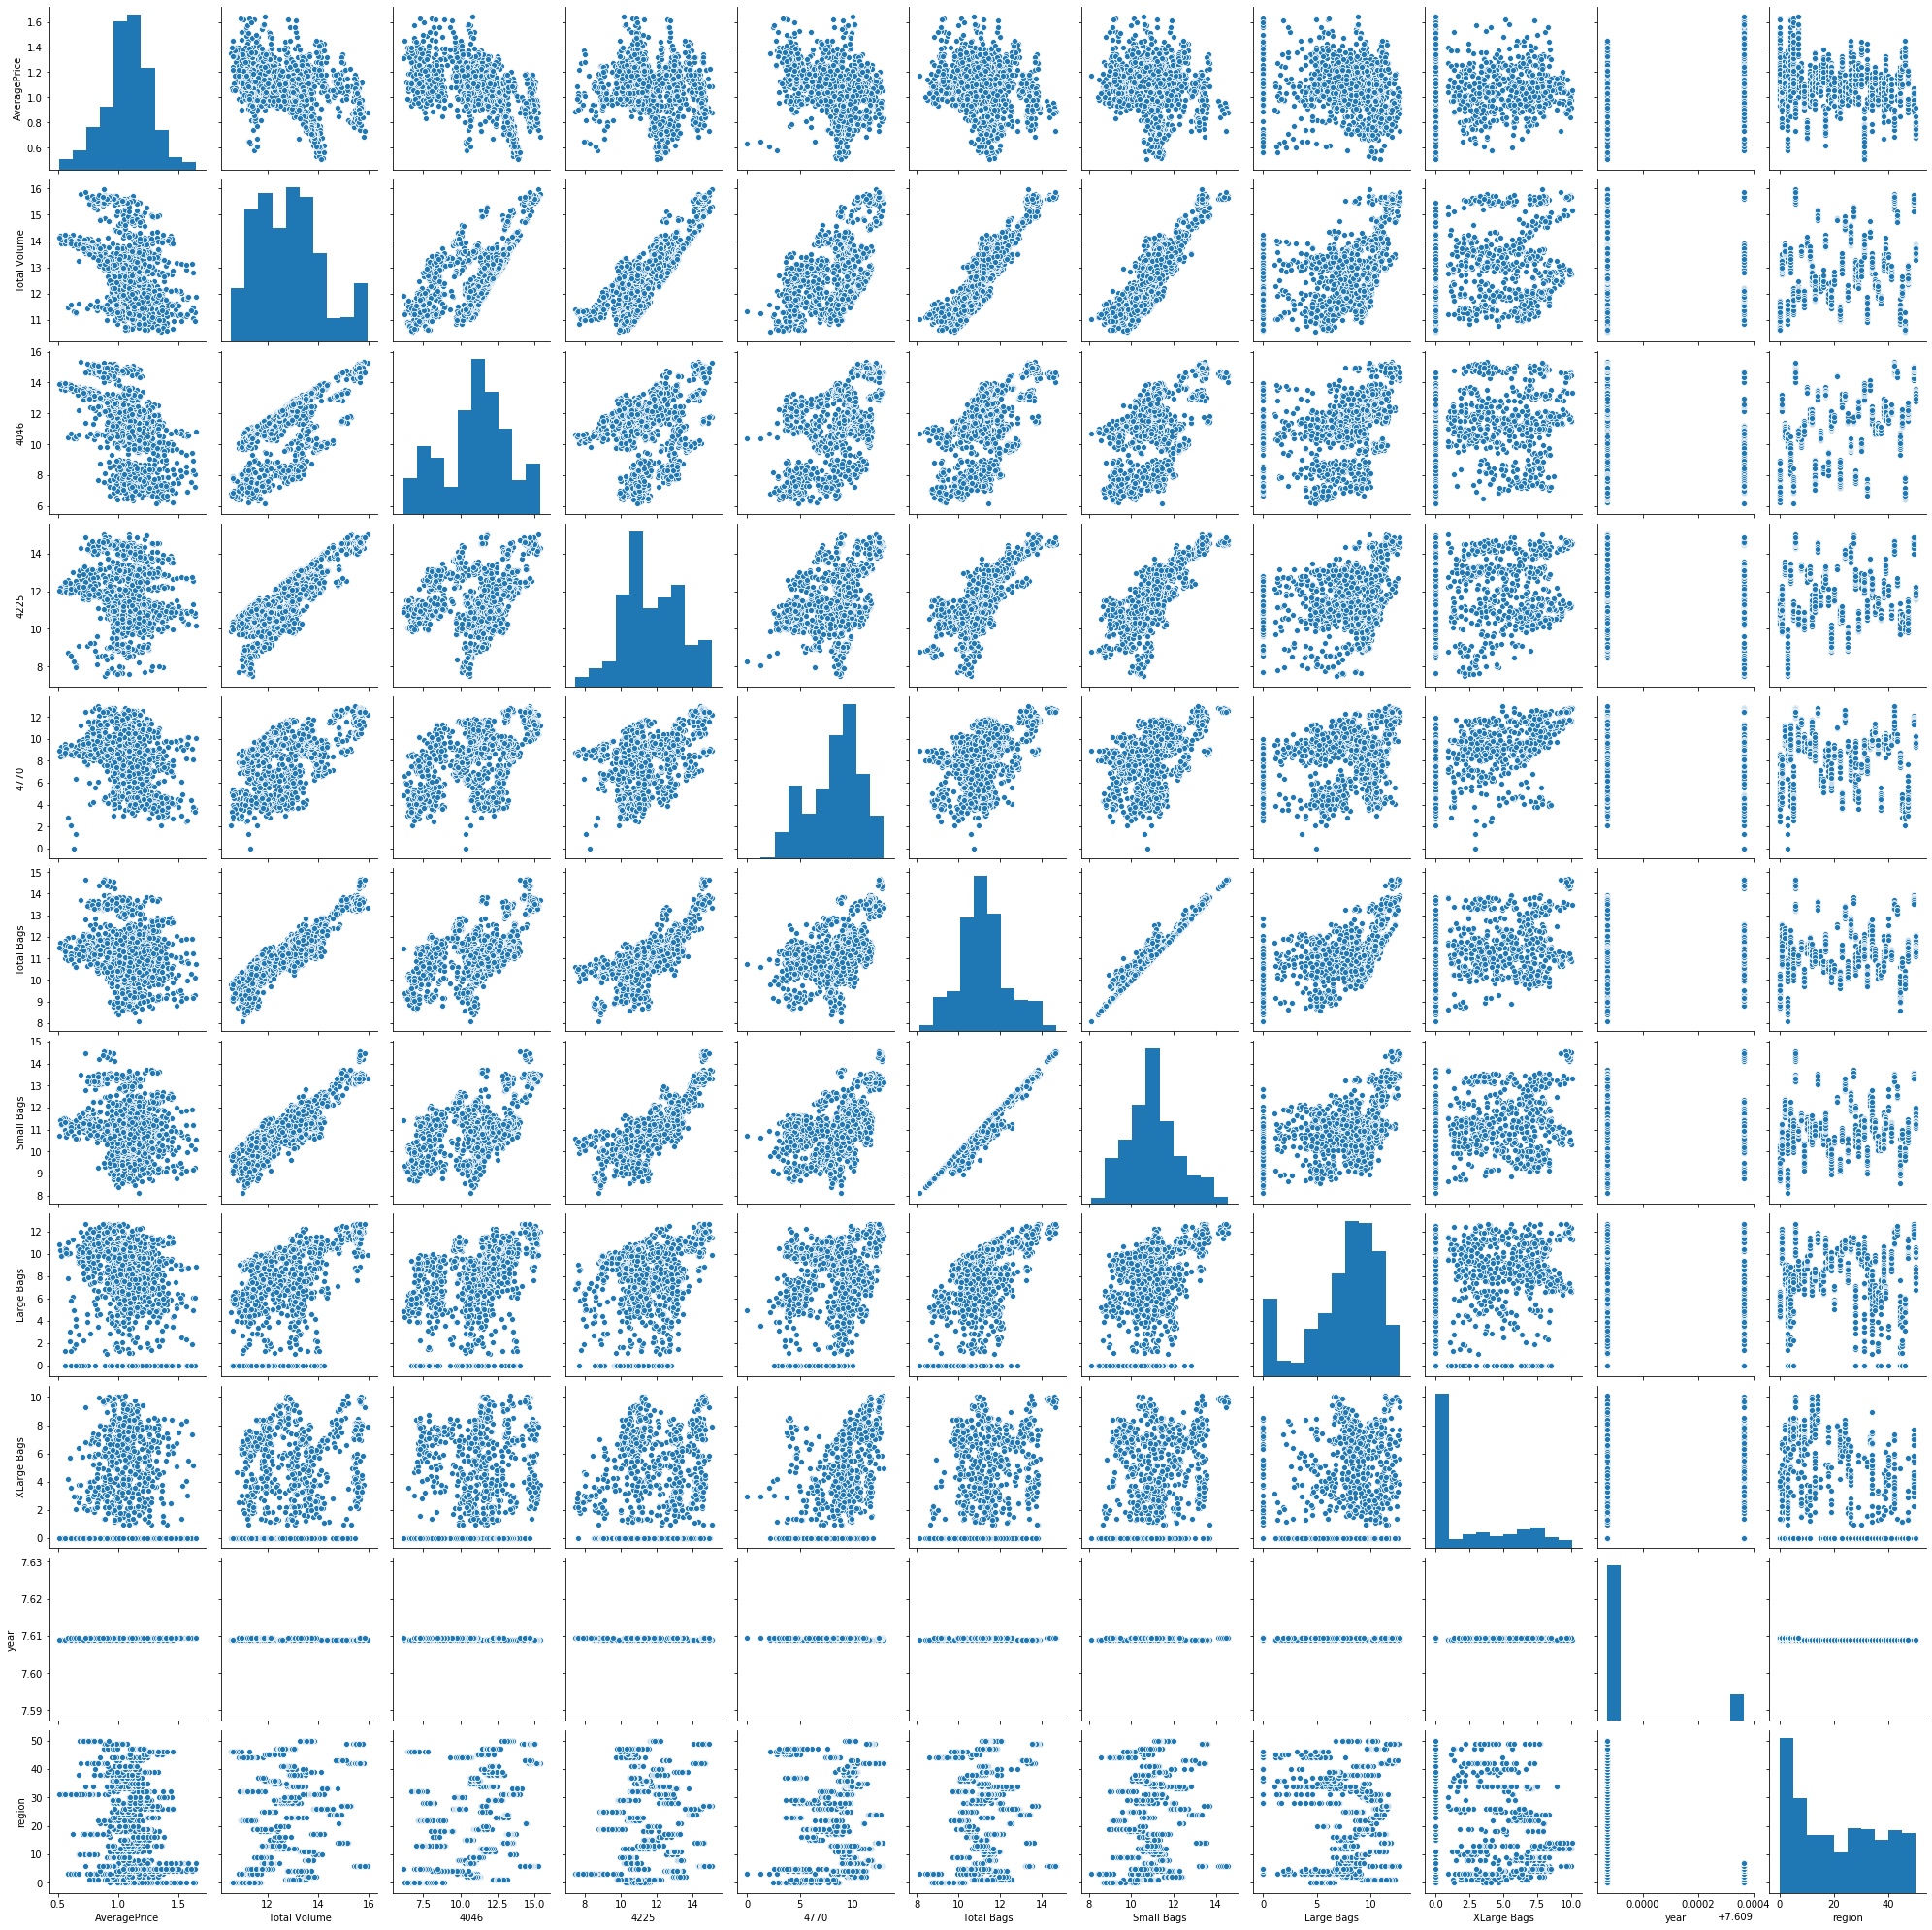

In [222]:
# Checking pairplots
sns.pairplot(nds)
plt.show()

# Linear regression to predict average price

# Split dataset into x and y

In [223]:
nds.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

In [224]:
# Lineup target and input values
nds_x=nds.drop(columns=['AveragePrice'])
nds_y=nds[['AveragePrice']]

In [225]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.externals import joblib
from sklearn import linear_model

In [226]:
#Scaling for linear regression
sc=StandardScaler()
x=sc.fit_transform(nds_x)
x=pd.DataFrame(x,columns=nds_x.columns)

In [227]:
x.skew()

Total Volume    0.462899
4046           -0.270283
4225            0.011359
4770           -0.449713
Total Bags      0.378673
Small Bags      0.420856
Large Bags     -0.979047
XLarge Bags     0.851740
year            2.004439
region          0.276276
dtype: float64

In [228]:
# Train test split
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=55, test_size=0.20)

In [229]:
# Error calculation
max_r_score=0
for r_state in range(42,100):
    x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=r_state, test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print("Max r2 score for",final_r_state,"is", max_r_score)

Max r2 score for 57 is 0.46526833540687995


In [230]:
# Crossvalidation
cross_val_score(linear_model.LinearRegression(),x,nds_y,cv=10,scoring='r2').mean()

0.003924968504571269

In [231]:
# R2 score gives us a rondom state of 57
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=57, test_size=0.20)
lreg=linear_model.LinearRegression()
lreg.fit(x_train,y_train)
y_pred=lreg.predict(x_test)

In [232]:
# R2 and Mean squared error statements
print('r score is: ',r2_score(y_test,y_pred))
print('RMSE is: ', np.sqrt(mean_squared_error(y_test, y_pred)))

r score is:  0.46526833540687995
RMSE is:  0.1400430533166485


# Other regression models

In [233]:
# Loop for SVR types
from sklearn.svm import SVR

kernellist=['linear','poly','rbf']
for i in kernellist:
    sv=SVR(kernel=i)
    sv.fit(x_train,y_train)
    print(sv.score(x_train,y_train))

0.3766344619400286
0.7005540359222533
0.8112024519441832


In [234]:
# Best parameters for KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

kn=KNeighborsRegressor()
parameters={'n_neighbors':(1,30)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 1}

In [235]:
knr = KNeighborsRegressor(n_neighbors=1)
knr.fit(x_train,y_train)
print(knr.score(x_train,y_train))

1.0


I choose the KNeighborsRegessor model because it has the best score, a perfect score of 100%

# Save the model

In [236]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(knr,'Avo_Ave_Price.pkl')

['Avo_Ave_Price.pkl']

In [237]:
# Load and use model to make a prediction
model=joblib.load('Avo_Ave_Price.pkl')
model.predict(x_test)

array([[1.28],
       [0.98],
       [1.15],
       [1.07],
       [1.05],
       [1.1 ],
       [1.17],
       [1.  ],
       [1.12],
       [1.08],
       [0.85],
       [0.97],
       [0.93],
       [1.12],
       [1.26],
       [0.7 ],
       [0.7 ],
       [1.18],
       [1.03],
       [1.01],
       [0.87],
       [1.11],
       [1.18],
       [1.14],
       [1.08],
       [1.07],
       [1.02],
       [1.09],
       [0.72],
       [1.08],
       [1.37],
       [0.98],
       [0.94],
       [1.1 ],
       [1.23],
       [1.13],
       [1.09],
       [1.1 ],
       [1.54],
       [0.89],
       [0.71],
       [1.01],
       [1.2 ],
       [1.03],
       [1.14],
       [1.11],
       [1.01],
       [1.25],
       [1.22],
       [1.19],
       [0.85],
       [1.36],
       [1.25],
       [1.29],
       [1.15],
       [0.97],
       [1.14],
       [0.67],
       [1.45],
       [0.57],
       [1.01],
       [1.45],
       [1.03],
       [1.2 ],
       [1.45],
       [1.1 ],
       [0.

# Classification to predict region

# Split dataset into x and y

In [238]:
nds.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

In [239]:
# Lineup target and input values
nds_x=nds.drop(columns='region') 
y=nds[['region']]
nds_x.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.0,7.608871
1,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.0,7.608871
2,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.0,7.608871
3,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.0,7.608871
4,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.0,7.608871


In [240]:
# Train test split
x_train,x_test, y_train, y_test = train_test_split(x,nds_y, random_state=55, test_size=0.20)

In [241]:
from sklearn.preprocessing import MinMaxScaler
# define min max scaler
scaler = MinMaxScaler()
# transform data
sc_x = scaler.fit_transform(nds_x)

In [242]:
x=pd.DataFrame(sc_x)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.725664,0.093620,0.086330,0.452539,0.300463,0.146656,0.147697,0.356640,0.0,0.0
1,0.743363,0.064450,0.039659,0.426223,0.314968,0.160163,0.161527,0.360092,0.0,0.0
2,0.371681,0.206607,0.057483,0.544598,0.376362,0.136703,0.137257,0.364468,0.0,0.0
3,0.504425,0.131921,0.095870,0.489472,0.331572,0.085409,0.083385,0.384690,0.0,0.0
4,0.681416,0.051022,0.075872,0.423828,0.334856,0.094854,0.091580,0.415149,0.0,0.0


In [243]:
x.skew()

0   -0.184770
1    0.462899
2   -0.270283
3    0.011359
4   -0.449713
5    0.378673
6    0.420856
7   -0.979047
8    0.851740
9    2.004439
dtype: float64

In [244]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Using GridSearchCV to select the best parameter

In [245]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB

In [246]:
# Best parameters for SVC
from sklearn.model_selection import GridSearchCV

sv=SVC()
parameters={'kernel':('poly','rbf','linear')}
gd=GridSearchCV(sv,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'poly'}

In [247]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [248]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 1}

# Comparing classification algorithm results

In [249]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [250]:
KNN=KNeighborsClassifier(n_neighbors= 1)
SV=SVC(kernel='poly')# check c parameter?
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?
MNB=MultinomialNB()

In [251]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))
models.append(('MultinomialNB',MNB))

************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')



Accuracy score = 0.962877030162413


cross validation score = 0.9485334110334109


classification_report
               precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        13
           7       0.92      1.00      0.96        12
           8       1.00      1.00      1.00         7
           9       0.88      1.00      0.94        15
          10       1.00      0.86  

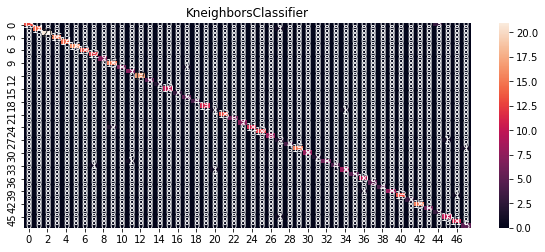

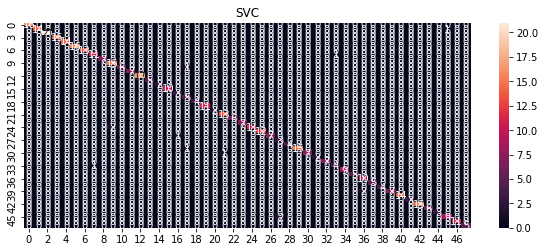

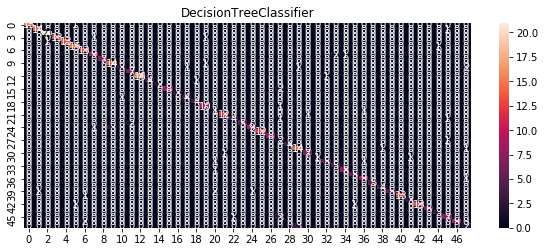

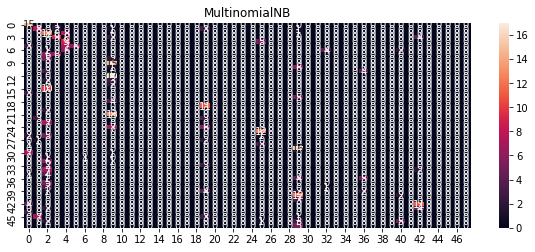

In [252]:
model_list=[]
score=[]
cvs=[]


for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
  
    print('\n\n')

In [253]:
# Show the results of the models above in a table
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KneighborsClassifier,96.287703,94.853341
1,SVC,96.983759,95.961538
2,DecisionTreeClassifier,87.238979,85.721154
3,MultinomialNB,30.394432,31.467560


In [254]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9791183294663574
[[15  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.88      1.00      0.94        15
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        14
           5       0.94      1.00      0.97        16
           6       0.93      1.00      0.96        13
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00         7
           9       0.88      1.00      0.94        15
          10       0.86      0.86      0.86         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         5
          14  

# Using StandardScaler without MultinomialNB

In [255]:
# Lineup target and input values
x=nds.drop(columns='region') 
y=nds[['region']]

In [256]:
#Scaling for linear regression
sc=StandardScaler()
x=sc.fit_transform(nds_x)
x=pd.DataFrame(x,columns=nds_x.columns)

In [257]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Using GridSearchCV to select the best parameter

In [258]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


In [259]:
# Best parameters for SVC
from sklearn.model_selection import GridSearchCV

sv=SVC()
parameters={'kernel':('poly','rbf','linear')}
gd=GridSearchCV(sv,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'kernel': 'linear'}

In [260]:
# Best parameters for DecisionTree

dt=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dt,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'criterion': 'entropy'}

In [261]:
# Best parameters for KNeighborsClassifier

kn=KNeighborsClassifier()
parameters={'n_neighbors':(1,10)}
gd=GridSearchCV(kn,parameters)
gd.fit(x_train,y_train)
gd.best_params_

{'n_neighbors': 1}

# Comparing classification algorithm results

In [262]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,auc

In [263]:
KNN=KNeighborsClassifier(n_neighbors= 1)
SV=SVC(kernel='linear')# check c parameter?
DT=DecisionTreeClassifier(criterion='entropy')# check random_state?


In [264]:
models=[]
models.append(('KneighborsClassifier',KNN))
models.append(('SVC',SV))
models.append(('DecisionTreeClassifier',DT))


************************* KneighborsClassifier *************************

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')



Accuracy score = 0.9698375870069605


cross validation score = 0.9512917637917638


classification_report
               precision    recall  f1-score   support

           0       1.00      0.88      0.93        16
           1       1.00      0.93      0.97        15
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        14
           5       1.00      1.00      1.00        16
           6       1.00      1.00      1.00        13
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00         7
           9       0.88      1.00      0.94        15
          10       1.00      0.86 

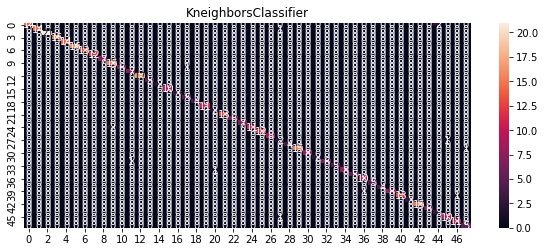

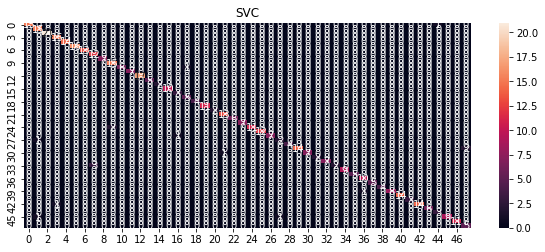

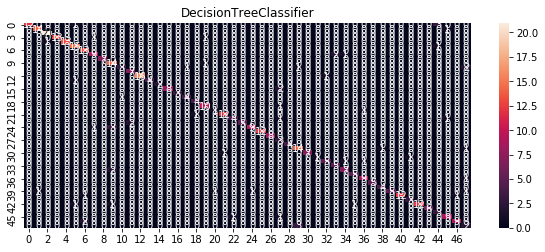

In [265]:
model_list=[]
score=[]
cvs=[]


for name, model in models:
    print('*************************',name,'*************************',end='\n\n')
   
    model_list.append(name)
    model.fit(x_train,y_train)
    print(model,end='\n\n')
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy score =',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y, cv=10, scoring='accuracy').mean()
    print('cross validation score =',sc)
    cvs.append(sc*100)
    print('\n')
    
    print('classification_report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    print('\n\n')

In [266]:
result=pd.DataFrame({'Model': model_list, 'Accuracy_score': score, 'Cross_val_score':cvs})
result

,Model,Accuracy_score,Cross_val_score
0,KneighborsClassifier,96.983759,95.129176
1,SVC,96.287703,94.916958
2,DecisionTreeClassifier,86.542923,85.441919


# More Classification Models

In [267]:
from sklearn.ensemble import RandomForestClassifier

rf= RandomForestClassifier(n_estimators=100,random_state=42)#100 is defualt
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.9791183294663574
[[15  0  0 ...  0  0  0]
 [ 0 15  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 11  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       0.88      1.00      0.94        15
           2       1.00      1.00      1.00        21
           3       1.00      1.00      1.00        15
           4       1.00      1.00      1.00        14
           5       0.94      1.00      0.97        16
           6       0.93      1.00      0.96        13
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00         7
           9       0.88      1.00      0.94        15
          10       0.86      0.86      0.86         7
          11       1.00      1.00      1.00         7
          12       1.00      1.00      1.00        17
          13       1.00      1.00      1.00         5
          14  

I choose the RandomForestClassifiermodel

accuracy score = 97.9

precision =99

recall = 98


# Save the model

In [ ]:
#save model as a pickle file
from sklearn.externals import joblib
joblib.dump(rf,'Avo_Region.pkl')

In [ ]:
# Load and use model to make a prediction
model=joblib.load('Avo_Region.pkl')
model.predict(x_test)